<a href="https://colab.research.google.com/github/nguyenhuy-vn/Finger-identification-based-on-capacitives-touch-screen/blob/main/data_for_right_thumb_and_left_thumb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Load data from pkl file

In [4]:
df = pd.read_pickle("/content/drive/MyDrive/full_preprocess_data.pkl")

In [5]:
#view df
df.head(5)

,Participant,Handedness,Finger,Task,Matrix,Timestamp,BlobCoords,BlobCount,Blobs,BlobImage,BlobImgFlattened
16,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194926,"[(10, 14, 14, 18)]",1,"[[[1, 17, 27, 5], [6, 105, 140, 27], [18, 161,...","[[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
19,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
20,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
len(df)

455709

In [8]:
df = df[df['Finger'] == 'thumb']

In [9]:
df['Finger'].unique()

array(['thumb'], dtype=object)

In [12]:
df['Handedness'].unique()

array(['right', 'left'], dtype=object)

In [10]:
df['Task'].unique()

array(['SCROLL', 'TAP', 'DRAG'], dtype=object)

In [11]:
df['Participant'].unique()

array([12,  8,  4, 16, 15,  9,  7, 13,  1,  5,  6, 10,  3,  2, 14, 19, 11,
       18, 17, 20])

### Split the participant id train

In [13]:
np.random.seed(11)
participant_id = df['Participant'].unique()
size = int(len(participant_id) * 0.8)
participant_id_train = np.random.choice(participant_id, size = size, replace = False)
participant_id_train

array([16,  9,  6,  7, 14, 20, 19,  5, 17, 15, 10, 12,  1,  4, 13,  8])

### Encoder and add label column

In [14]:
Handedness = df['Handedness'].unique()
Finger = df['Finger'].unique()
Handedness, Finger

(array(['right', 'left'], dtype=object), array(['thumb'], dtype=object))

In [15]:
num = 0
dict_data = {}
for i in range (0, len(Handedness)):
  for j in range (0, len(Finger)):
    dict_temp = {Handedness[i] + ' ' + Finger[j]: num}
    dict_data.update(dict_temp)
    num = num + 1

dict_data

{'right thumb': 0, 'left thumb': 1}

In [16]:
def get_feature_column (handedness, finger):
  c = handedness + ' ' + finger
  return dict_data[c]

df['label'] = [get_feature_column(df.Handedness.iloc[i], df.Finger.iloc[i]) for i in range (len(df))]

df['label'].unique()

<ipython-input-16-ad9a37d43774>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = [get_feature_column(df.Handedness.iloc[i], df.Finger.iloc[i]) for i in range (len(df))]


array([0, 1])

### Split data

In [21]:
def get_data (ones_train, ones_test, ones_train_label, ones_test_label, dframe, i):
  for i in range(len(dframe)):
    temp = int(dframe.iloc[i].Participant)
    if (temp == participant_id_train).any():
      arr_train = np.array(dframe.iloc[[i]].Blobs)
      arr_train = arr_train[0][0].astype(np.uint8)
      arr_train = cv2.resize(arr_train, (32, 32), interpolation = cv2.INTER_NEAREST)
      y_temp1 = df.label.iloc[i]
      if( type(ones_train) is str):
        ones_train = [arr_train]
        ones_train_label = [y_temp1]
      else:
        ones_train.extend([arr_train])
        ones_train_label.append(y_temp1)
    else:
      arr_test = np.array(dframe.iloc[[i]].Blobs)
      arr_test = arr_test[0][0].astype(np.uint8)
      arr_test = cv2.resize(arr_test, (32, 32), interpolation=cv2.INTER_NEAREST)
      y_temp2 = df.label.iloc[i]
      if(type(ones_test) is str):
        ones_test = [arr_test]
        ones_test_label = [y_temp2]
      else:
        ones_test.extend([arr_test])
        ones_test_label.append(y_temp2)
  return ones_train, ones_test, ones_train_label, ones_test_label


In [22]:
X_train = ""
X_test = ""
Y_train = ""
Y_test = ""
i = 0
X_train, X_test, Y_train, Y_test = get_data(X_train, X_test, Y_train, Y_test, df, i)

array([[ 2,  2,  2, ...,  5,  5,  5],
       [ 2,  2,  2, ...,  5,  5,  5],
       [ 2,  2,  2, ...,  5,  5,  5],
       ...,
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13]], dtype=uint8)
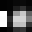

In [23]:
X_train[0]

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [25]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)

In [26]:
X_train[0]

array([[0.00784314, 0.00784314, 0.00784314, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.01960784, 0.01960784,
        0.01960784],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05098039, 0.05098039,
        0.05098039],
       [0.        , 0.        , 0.        , ..., 0.05098039, 0.05098039,
        0.05098039],
       [0.        , 0.        , 0.        , ..., 0.05098039, 0.05098039,
        0.05098039]], dtype=float32)

In [27]:
np.random.seed(11)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)

X_train.shape, X_val.shape, X_test.shape

((61122, 32, 32), (15281, 32, 32), (19168, 32, 32))

### One hot enconding

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

In [29]:
Y_train[0]

array([0., 1.])

### Save matrix


In [30]:
label = list ((dict_data.keys()))
label

['right thumb', 'left thumb']

In [31]:
label_me = np.array(label)
label_me

array(['right thumb', 'left thumb'], dtype='<U11')

In [33]:
#save data train and test
np.save('/content/drive/MyDrive/data_for_2/X_train.npy', X_train)
np.save('/content/drive/MyDrive/data_for_2/X_val.npy', X_val)
np.save('/content/drive/MyDrive/data_for_2/X_test.npy', X_test)
np.save('/content/drive/MyDrive/data_for_2/Y_train.npy', Y_train)
np.save('/content/drive/MyDrive/data_for_2/Y_val.npy', Y_val)
np.save('/content/drive/MyDrive/data_for_2/Y_test.npy', Y_test)
np.save('/content/drive/MyDrive/data_for_2/label.npy', label_me)